# 1. Dependencies import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scripts.utils import fill_infos

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

np.random.seed(294697)

***
# 2. Data import

In [2]:
data = pd.read_csv("datas/sample.csv", index_col=[0])

/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


***
# 3. Overview

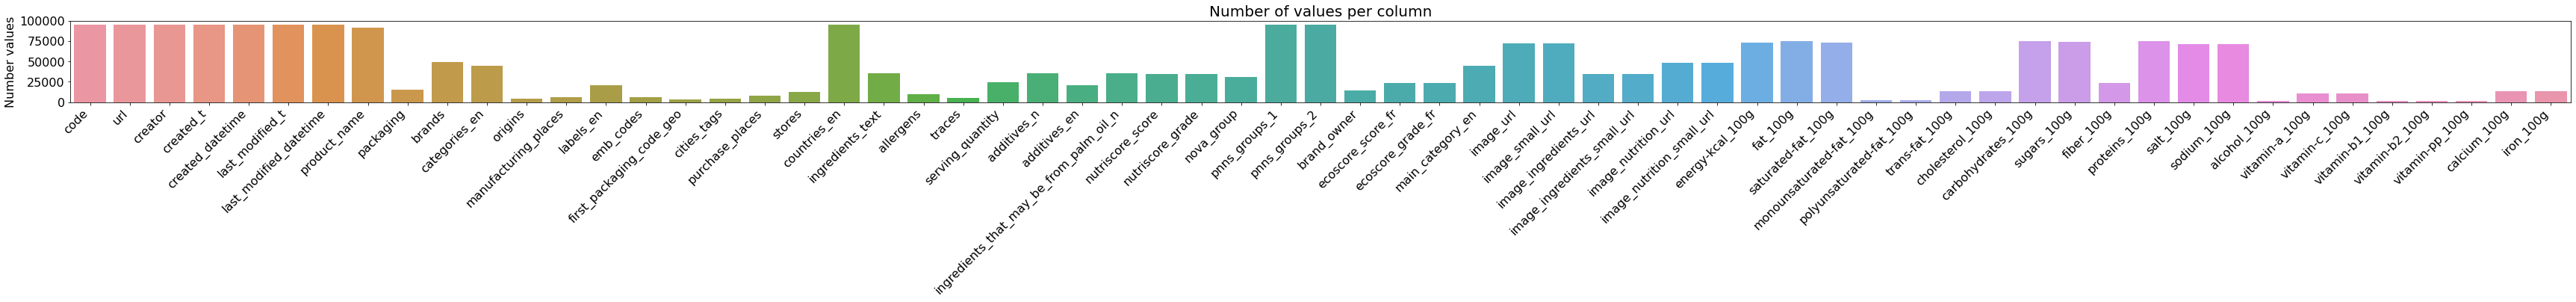

In [3]:
plt.figure(figsize=(60,2))

barplot = sns.barplot(x=data.columns, y=data.apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

***
# 4. Global correlations

In [4]:
corr = data.corr()

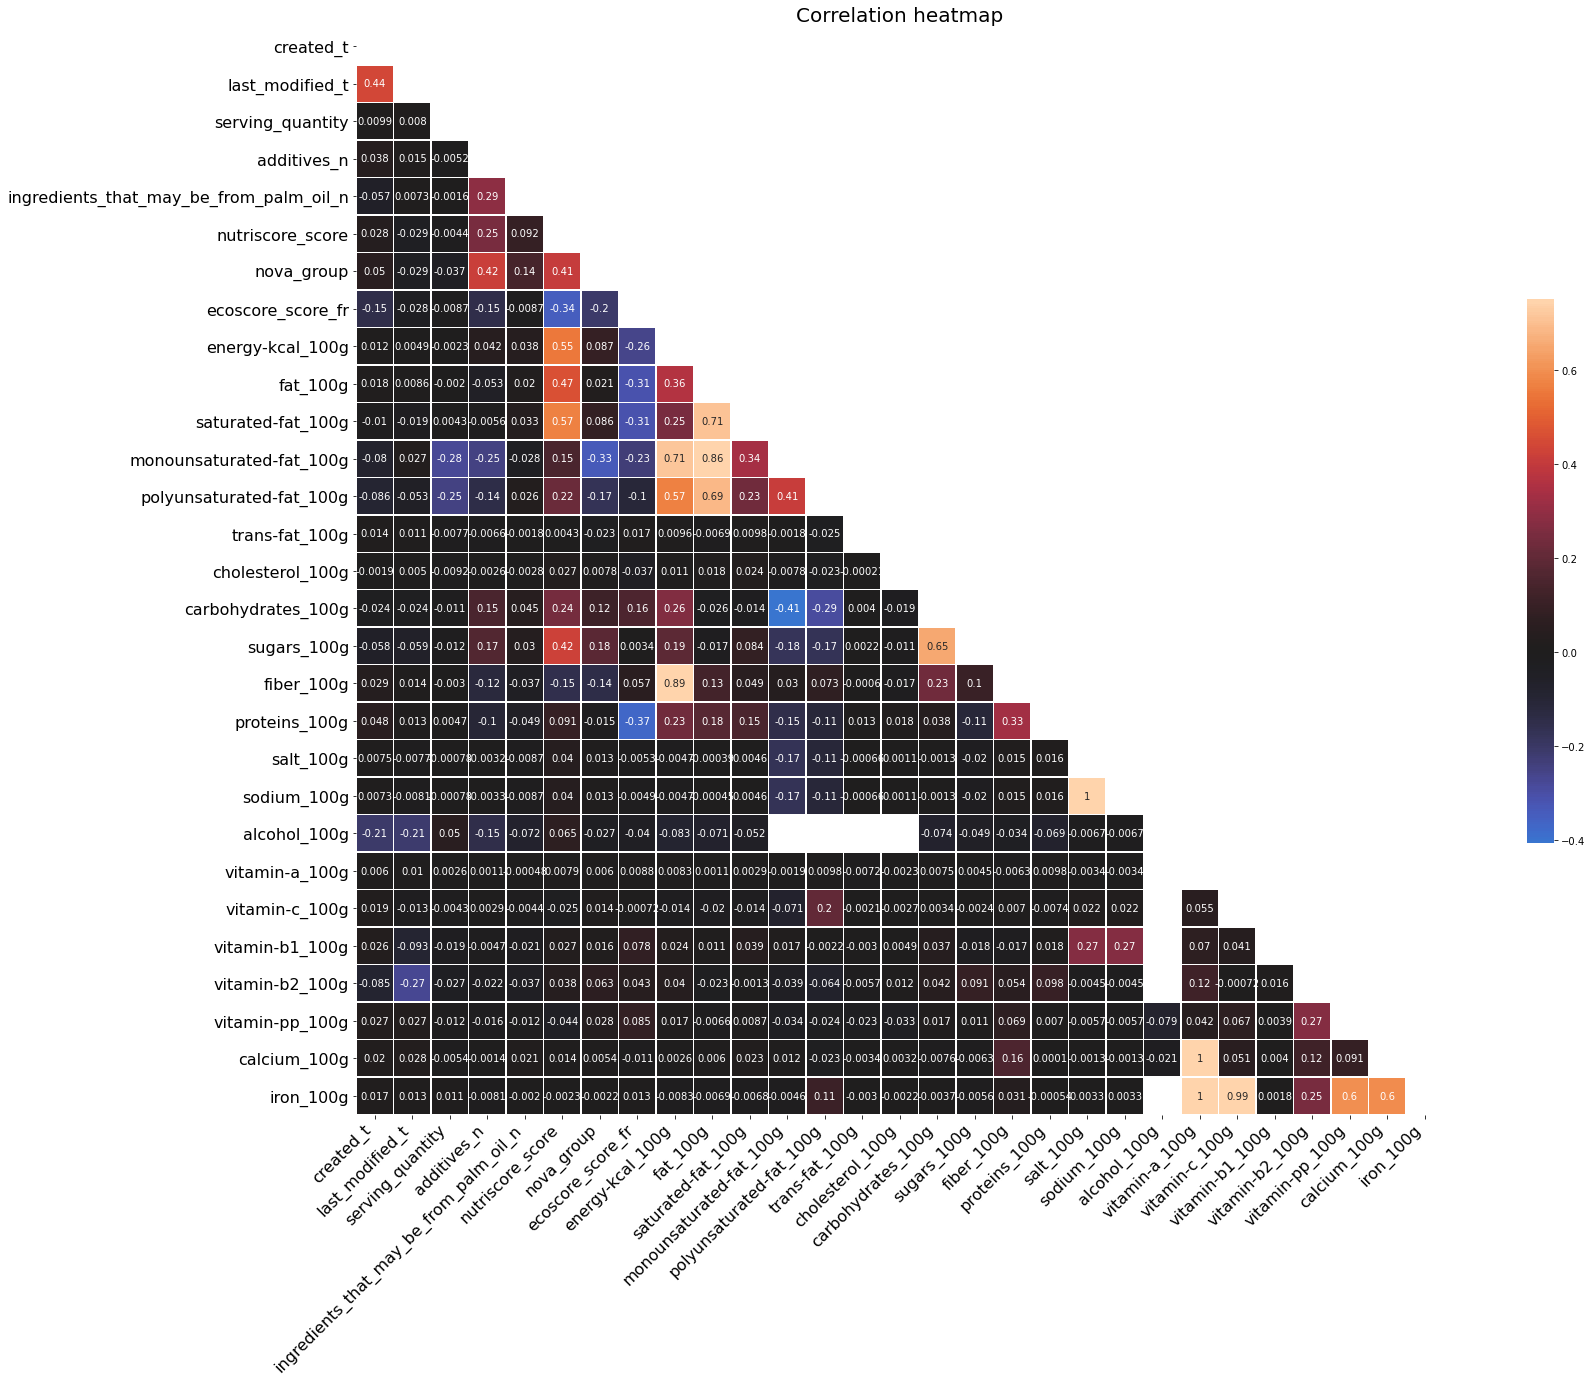

In [5]:
plt.figure(figsize=(30, 20))

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(data=corr, mask=mask, annot=True, vmax=.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation heatmap", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.show()

***
# 5. Nutriscore / Ecoscore correlations

<AxesSubplot:title={'center':'Nutriscore correlations'}, ylabel='nutriscore_score'>

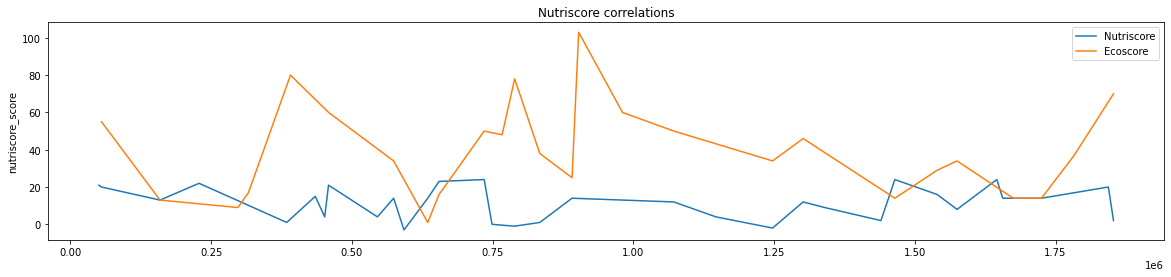

In [6]:
plt.figure(figsize=(20, 4))

plt.title("Nutriscore correlations")

sns.lineplot(y=data.nutriscore_score[::1000], x=data.index[::1000], label="Nutriscore")
sns.lineplot(y=data.ecoscore_score_fr[::1000], x=data.index[::1000], label="Ecoscore")

Nutriscore: the bigger the value, the worst the product is.  
Ecoscore: the bigger the value, the worst the environemental impact is.

## Conclusion:
The worst is a product (high nutriscore), the better it is for the environement (low ecoscore).

***
# 6. Nutriscore / Ecoscore distribution

<Figure size 720x432 with 0 Axes>

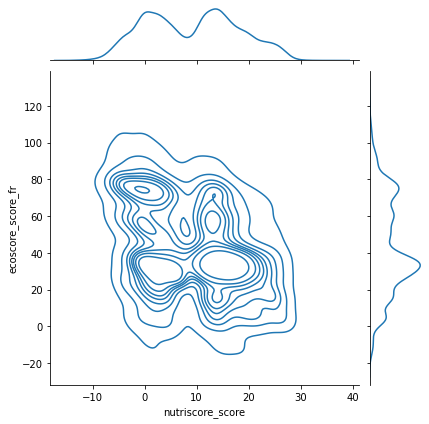

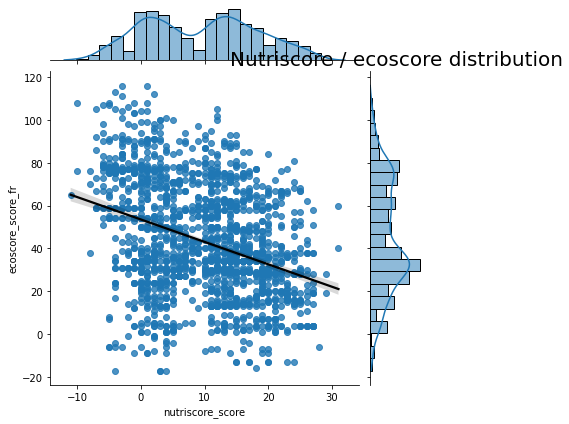

In [44]:
fig = plt.figure(figsize=(10, 6))

sns.jointplot(x="nutriscore_score", y="ecoscore_score_fr", data=data.iloc[::1], kind="kde")
sns.jointplot(x="nutriscore_score", y="ecoscore_score_fr", data=data.iloc[::10], kind="reg", color=None, joint_kws={"line_kws": {'color':'black'}})

plt.title("Nutriscore / ecoscore distribution", size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("Nutriscore", size=16)
plt.ylabel("Ecoscore", size=16)
plt.show()

***
# 7. Nutriscore / countries disribution

In [8]:
data.countries_en.head(20)

55254           United States
29432                   Spain
4008            United States
9814            United States
21035           United States
97812           United States
90159           United States
40876           United States
59776    France,United States
94983           United States
16036           United States
22163           United States
32260           United States
55922           United States
82159           United States
85526           United States
61281           United States
25891           United States
62796           United States
56125           United States
Name: countries_en, dtype: object

The feature "countries_en" is in reality a list, as we can see at index 59776: France,United States.  
We will choose to keep only the last country in this list for each row.

In [9]:
def keep_last_country(row):
    cotr = row["countries_en"]
    splt = cotr.split(",")
    row["countries_en"] = splt[-1]
    return row

data = data[data.countries_en.notna()].apply(lambda row: keep_last_country(row), axis=1)

In [10]:
data.countries_en.head(20)

55254    United States
29432            Spain
4008     United States
9814     United States
21035    United States
97812    United States
90159    United States
40876    United States
59776    United States
94983    United States
16036    United States
22163    United States
32260    United States
55922    United States
82159    United States
85526    United States
61281    United States
25891    United States
62796    United States
56125    United States
Name: countries_en, dtype: object

Let's see now how the nutriscore is distributed by country.

In [11]:
data_by_countries_nutriscore = data.groupby(["countries_en", "nutriscore_grade"]).nutriscore_grade.agg([len])
data_by_countries_nutriscore

len
countries_en                             nutriscore_grade      
Algeria                                  a                    1
                                         b                    2
                                         c                    2
                                         d                    6
Algerie                                  a                    1
Allemagne                                e                    1
Andorra                                  a                    1
                                         c                    1
                                         d                    1
Argentina                                a                    6
                                         b                    3
                                         c                    3
                                         d                    2
                                         e                    2
Australia                                a                   28
                                         b                   17
                                         c                   20
                                         d                   18
                                         e                   17
Austria                                  a                    8
                                         b                   12
                                         c                   11
                                         d                   14
                                         e                    8
Autriche                                 d                    1
Bangladesh                               c                    1
Belarus                                  b                    1
Belgique                                 a                    1
                                         d                    1
                                         e                    1
Belgique-suisse-en-switzerland-en-france e                    1
Belgium                                  a                   76
                                         b                   82
                                         c                  104
                                         d                  155
                                         e                   73
Bolivia                                  d                    2
                                         e                    3
Brazil                                   a                    1
                                         b                    3
                                         c                    2
                                         e                    3
Bulgaria                                 a                    4
                                         b                    1
                                         c                    1
                                         e                    2
Burkina Faso                             d                    1
Canada                                   a                   20
                                         b                   30
                                         c                   32
                                         d                   33
                                         e                   19
Chile                                    a                    2
                                         b                    1
                                         c                    2
                                         d                    1
China                                    b                    1
                                         e                    1
Colombia                                 a                    4
                                         b                    4
                                         c                    7
                            

In [12]:
data_by_countries_nutriscore = data_by_countries_nutriscore.reset_index()
data_by_countries_nutriscore.head()

,countries_en,nutriscore_grade,len
0,Algeria,a,1
1,Algeria,b,2
2,Algeria,c,2
3,Algeria,d,6
4,Algerie,a,1


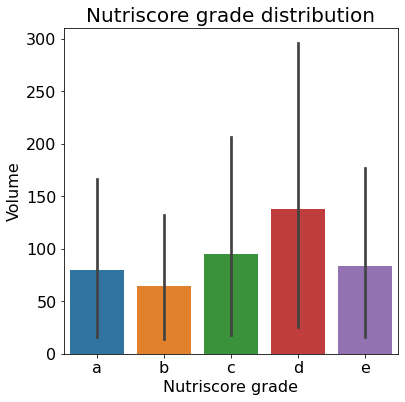

In [13]:
plt.figure(figsize=(6,6))

sns.barplot(x=data_by_countries_nutriscore["nutriscore_grade"], y=data_by_countries_nutriscore["len"])

plt.title("Nutriscore grade distribution", size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("Nutriscore grade", size=16)
plt.ylabel("Volume", size=16)
plt.show()

***
# 8. Ecoscore / countries distribution

Let's see now how the ecoscore is distributed by country.

In [14]:
data_by_countries_ecoscore = data.groupby(["countries_en", "ecoscore_grade_fr"]).ecoscore_grade_fr.agg([len])
data_by_countries_ecoscore

len
countries_en              ecoscore_grade_fr      
Algeria                   a                     1
                          b                     5
                          c                     5
                          d                     8
                          e                     1
Andorra                   c                     1
                          e                     1
Argentina                 a                     1
                          b                    11
                          c                    14
                          d                    12
                          e                     3
Australia                 a                     6
                          b                    38
                          c                    18
                          d                    23
                          e                    15
Austria                   a                     1
                          b                    14
                          c                     5
                          d                    13
                          e                     4
Autriche                  b                     1
Bangladesh                d                     2
Belarus                   b                     1
Belgique                  c                     1
Belgium                   a                     6
                          b                    99
                          c                    62
                          d                   165
                          e                    98
Bolivia                   b                     3
                          c                     1
                          d                     5
                          e                     2
Bosnia and Herzegovina    d                     1
Brazil                    b                     3
                          c                     3
                          d                     6
Bulgaria                  a                     1
                          b                     2
                          d                     1
                          e                     2
Burkina Faso              a                     1
                          c                     2
Cameroon                  b                     1
                          d                     1
Canada                    a                     2
                          b                    36
                          c                    16
                          d                    38
                          e                    20
Chile                     b                     2
                          c                     2
                          d                     3
China                     b                     1
                          d                     1
Colombia                  b                     4
                          c                     7
                          d                     8
                          e                     6
Costa Rica                d                     1
Croatia                   b                     1
                          d                     1
                          e                     1
Cyprus                    b                     1
                          c                     1
                          d                     1
Czech Republic            a                     1
                          b                     3
                          c                     6
                          d                     5
                          e                     2
Côte d'Ivoire             a                     2
                          b                     1
                          c                     1
                          d                     1
Denmark                   a                     1
                          b                   

In [15]:
data_by_countries_ecoscore = data_by_countries_ecoscore.reset_index()
data_by_countries_ecoscore.head()

,countries_en,ecoscore_grade_fr,len
0,Algeria,a,1
1,Algeria,b,5
2,Algeria,c,5
3,Algeria,d,8
4,Algeria,e,1


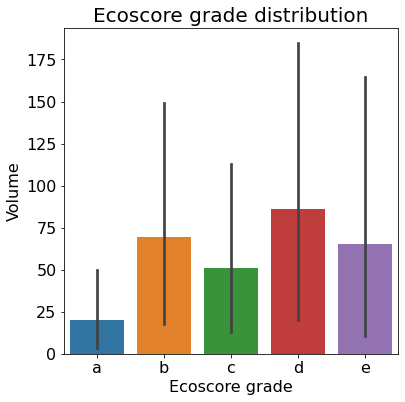

In [16]:
plt.figure(figsize=(6,6))

sns.barplot(x=data_by_countries_ecoscore["ecoscore_grade_fr"], y=data_by_countries_ecoscore["len"])

plt.title("Ecoscore grade distribution", size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("Ecoscore grade", size=16)
plt.ylabel("Volume", size=16)
plt.show()

***
# ---